In [136]:
from webscraping.scraper import fetch_all_csv_from_drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns


In [138]:
folder_id = "1EafyzmaIUfPRXzwt8s4TSOQcQ00U4BTF"
credentials_path = "/Users/rahilshaik/voyager-voting-clustering/voyager-voting-clusters-6298ed68537b.json"

df = fetch_all_csv_from_drive(folder_id, credentials_path)

if df is not None:
    print(df.head())

Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 100%
Progress: 

In [139]:
df.head()

,christineoh51@berkeley.edu,4,source_file,3,Unnamed: 1,2,5,1
0,lilianxu@berkeley.edu,4.0,name_158.csv,NaN,NaN,NaN,NaN,NaN
1,mayurihebbar@berkeley.edu,NaN,name_158.csv,NaN,NaN,NaN,NaN,NaN
2,shivanisahni@berkeley.edu,3.0,name_158.csv,NaN,NaN,NaN,NaN,NaN
3,annacheng@berkeley.edu,3.0,name_158.csv,NaN,NaN,NaN,NaN,NaN
4,emilyynhi@berkeley.edu,NaN,name_158.csv,NaN,NaN,NaN,NaN,NaN


In [140]:
df_tst = df
df_tst.columns = ["email", "score", "source_file", "ignore", "ignore", "ignore", "ignore", "ignore"]

In [141]:
df_tst = df_tst[["email", "score", "source_file"]]

In [142]:
df_tst= df_tst.dropna(subset=["score"]).copy()
df_agg = df_tst.groupby("email")["score"].mean().reset_index()

In [143]:
df_agg.head()

,email,score
0,adorado@berkeley.edu,3.379310
1,anjalidixit@berkeley.edu,3.285714
2,annacheng@berkeley.edu,3.333333
3,benjamin.liang@berkeley.edu,2.680000
4,brennandai@berkeley.edu,3.400000


In [144]:
scaler = StandardScaler()
df_agg["score_scaled"] = scaler.fit_transform(df_agg[["score"]])

In [149]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df_agg["cluster"] = kmeans.fit_predict(df_agg[["score_scaled"]])

/var/folders/_s/gyy2hzx57s90tk86zfdrv0p40000gn/T/ipykernel_30015/2215678203.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=df_agg["cluster"], y=df_agg["score_scaled"], jitter=True, palette="viridis")
/var/folders/_s/gyy2hzx57s90tk86zfdrv0p40000gn/T/ipykernel_30015/2215678203.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


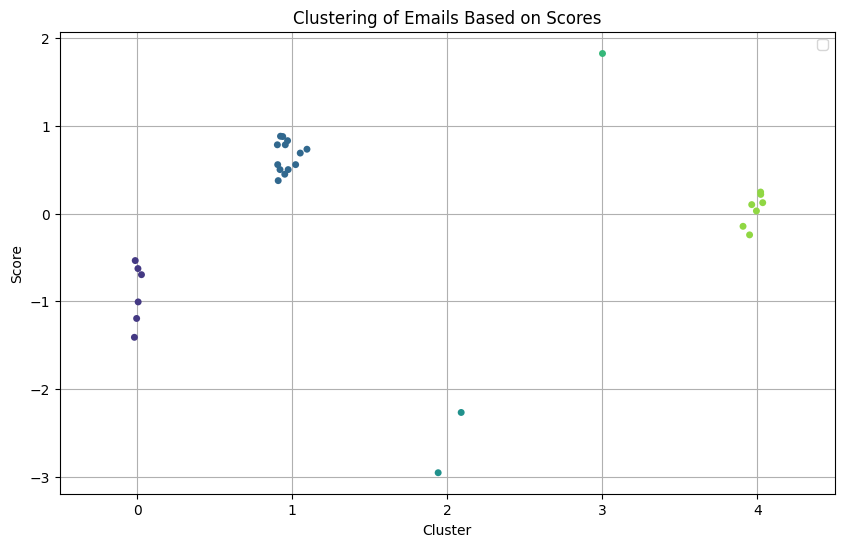

In [158]:
plt.figure(figsize=(10, 6))
sns.stripplot(x=df_agg["cluster"], y=df_agg["score_scaled"], jitter=True, palette="viridis")
plt.xlabel("Cluster")
plt.ylabel("Score")
plt.title("Clustering of Emails Based on Scores")
plt.legend()
plt.grid()
plt.show()

In [161]:
df_agg.query("cluster == 4")["email"].unique()

array(['anjalidixit@berkeley.edu', 'cindyw@berkeley.edu',
       'ericwang0533@berkeley.edu', 'jtao22@berkeley.edu',
       'nolancostin@berkeley.edu', 'rahilisashaik@berkeley.edu',
       'rpiao.26@berkeley.edu'], dtype=object)

In [170]:
df_pivot = df.pivot_table(index="email", columns="source_file", values="score", aggfunc="mean")
correlation_matrix = df_pivot.corr(method="pearson", min_periods=1) 
correlation_matrix.head()

source_file,name_110.csv,name_111.csv,name_118.csv,name_124.csv,name_128.csv,name_129.csv,name_130.csv,name_136.csv,name_137.csv,name_139.csv,...,name_80.csv,name_81.csv,name_83.csv,name_84.csv,name_87.csv,name_91.csv,name_94.csv,name_95.csv,name_96.csv,name_97.csv
source_file,,,,,,,,,,,,,,,,,,,,,
name_110.csv,1.000000,0.379582,0.071725,0.621901,0.222577,0.183227,0.082038,-0.018970,0.220399,-0.096303,...,-0.025790,2.559689e-01,0.102402,0.135027,0.059648,-0.196116,0.177906,0.155066,0.195518,0.248820
name_111.csv,0.379582,1.000000,0.124309,0.319860,0.234592,0.303977,0.097494,0.257482,0.302567,0.260803,...,0.139989,3.473510e-01,0.045056,-0.237386,0.307906,0.104608,0.450517,0.464660,0.317925,0.131010
name_118.csv,0.071725,0.124309,1.000000,0.326355,0.089803,0.055575,-0.063500,-0.149095,-0.269318,-0.153093,...,-0.200458,-4.448197e-17,0.088003,0.430388,0.185389,-0.279109,-0.189925,0.125857,0.141403,-0.131874
name_124.csv,0.621901,0.319860,0.326355,1.000000,0.250522,0.277998,0.063359,-0.014214,-0.207949,-0.147347,...,-0.305991,1.132466e-01,0.136490,0.177473,0.166664,0.046625,0.156338,-0.038909,-0.012143,-0.113932
name_128.csv,0.222577,0.234592,0.089803,0.250522,1.000000,0.135193,0.299665,0.462247,0.281730,0.312451,...,0.067298,2.045336e-01,0.230793,0.331750,0.374147,0.057824,0.115728,0.133250,0.213201,0.160521


In [177]:
def extract_top_correlation_pairs(correlation_matrix, top_n=10):
    correlation_pairs = (
        correlation_matrix.stack()
        .reset_index()
        .rename(columns={"level_0": "Item_1", "level_1": "Item_2", 0: "Correlation"})
    )

    correlation_pairs = correlation_pairs[correlation_pairs["Item_1"] != correlation_pairs["Item_2"]]

    correlation_pairs["sorted_pair"] = correlation_pairs.apply(
        lambda x: tuple(sorted([x["Item_1"], x["Item_2"]])), axis=1
    )
    correlation_pairs = correlation_pairs.drop_duplicates(subset=["sorted_pair"]).drop(columns=["sorted_pair"])
    top_correlations = correlation_pairs.sort_values(by="Correlation", ascending=False).head(top_n)

    return top_correlations


In [178]:
top_10 = extract_top_correlation_pairs(correlation_matrix, top_n=10)
top_10

ValueError: cannot insert source_file, already exists